# Project: Investigate a Dataset - IMDB 10,000 Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The IMDB dataset includes over 10,000 rows of movies data from revenue generated to average user ratings. 






### Question(s) for Analysis

1. Is there a certain genre that generates more revenue than others?
2. Is there a correlation between movie ratings and the year it was released?

First we will import all the necessary python packages to help with the analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline


In [10]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.1MB/s eta 0:00:01   12% |████                            | 1.3MB 23.7MB/s eta 0:00:01    58% |██████████████████▊             | 6.1MB 18.1MB/s eta 0:00:01    67% |█████████████████████▌          | 7.0MB 20.2MB/s eta 0:00:01    76% |████████████████████████▋       | 8.0MB 25.1MB/s eta 0:00:01    88% |████████████████████████████▍   | 9.3MB 26.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01  9% |███                             | 1.2MB 23.2MB/s eta 0:00:01    59% |███████████████████▏            | 8.0MB 21.8MB/s eta 0:00:01    75% |████████████████████████▎       | 10.2MB 23.8MB/s eta 0:00:01    92% |█████████████████████████████▋  | 12.4MB 24.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: p

<a id='wrangling'></a>
## Data Wrangling


First, we will take a look at the dataset and see their data types and values

In [3]:
#load data from external website and display the first 5 rows
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After displaying the first 5 rows of data, I can spot many things that will need to be cleaned.

1. "cast" column has multiple values and is seperated by the mark "|"
2. "genres" column has multiple values and is seperated by the mark "|"
3. "production_companies" column has multiple values and is seperated by the mark "|"

In [6]:
#check rows and columns count

df.shape

(10866, 21)

In [7]:
#check datatypes for all columns

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

After checking the datatypes for each column, I found 1 column that doesn't look correct. The release_date column is currently an object. 

In [8]:
#check data type for release_date
type(df['release_date'][0])

str

My observation was correct, it is currently a string. This will not effect our analysis since we won't be using this column so we won't need to convert it to a date data type.

In [9]:
#check to see if there are missing values in rows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Looks like cast, hompeage, director, tagline, keywords, overview, genres, production companies are missing some data

Next we will check to see how many nulls we have in the dataset

In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

After doing a null check, most of the columns that have nulls will not matter since it will not be used in the analysis. 
We will be using the column "genres" and it is missing 23 values.

We will now check for duplicate rows

In [11]:
#check to see if there are duplicate rows

sum(df.duplicated())

1

There is 1 duplicate row found, we will delete this in the cleaning step.

Next I am going to check the "genre" column to see how many unique genres there are.

In [12]:
df.genres.nunique()

2039

There are currently 2,039 unique values in the column "genres". We will have to clean up this column to be able to use in the analysis as it is too many uniques to work with.

## CLEANING THE DATA

After mangling with the data, it looks like there are a few things we need to clean up.

1. Drop columns we won't be using in our analysis
2. Remove duplicate rows
3. Remove rows where genre has a null value (it is only a few so it won't effect the analysis)
4. Split the genres into it's own columns so we can perform analysis on it

In [4]:
#drop columns that we won't be using in the analysis
df.drop(['imdb_id','popularity','budget','original_title','cast','homepage','director','tagline','overview','production_companies','vote_count','budget_adj','revenue_adj', 'keywords', 'release_date'], axis=1, inplace=True)

In [14]:
df.head()

,id,revenue,runtime,genres,vote_average,release_year
0,135397,1513528810,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,76341,378436354,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,262500,295238201,119,Adventure|Science Fiction|Thriller,6.3,2015
3,140607,2068178225,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,168259,1506249360,137,Action|Crime|Thriller,7.3,2015


There was 1 duplicate found, we will now drop duplicate row

In [5]:
#drop duplicate
df.drop_duplicates(inplace=True)

In [6]:
#confirm correction by rechecking for duplicates in the data
sum(df.duplicated())



0

In [7]:
#since genre has some missing data, we will drop the rows that have null data
df = df[df['genres'].notna()]

In [8]:
#check to see if the count of rows are now all matching
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 6 columns):
id              10842 non-null int64
revenue         10842 non-null int64
runtime         10842 non-null int64
genres          10842 non-null object
vote_average    10842 non-null float64
release_year    10842 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 592.9+ KB


In [9]:
#after removing null values, we have to rebuild the index
df.reset_index(drop=True, inplace=True)

In the next step, we will have to split the genres in the "genres" column since at it's current state, we are unable to do any analysis on it with over 2,000 unique values.

In [10]:
#create new list to hold the genre value split
genre_trim = []

In [11]:
#loop through the dataframe, split the first genre value and append it to genre_trim list
n = 0
for index, row in df.iterrows():
    i = df.genres.str.strip().str.split("|",5)[n]
    t = i[0]
    genre_trim.append(t)
    n = n + 1

In [12]:
#verify the rows of genre_trim
print(len(genre_trim))

10842


In [28]:
#print genre_trim to verify that the split function worked
print(genre_trim)

['Action', 'Action', 'Adventure', 'Action', 'Action', 'Western', 'Science Fiction', 'Drama', 'Family', 'Comedy', 'Action', 'Science Fiction', 'Drama', 'Action', 'Action', 'Crime', 'Crime', 'Science Fiction', 'Romance', 'War', 'Action', 'Action', 'Action', 'Drama', 'Comedy', 'Action', 'Comedy', 'Crime', 'Drama', 'Action', 'Mystery', 'Crime', 'Comedy', 'Thriller', 'Adventure', 'Drama', 'Crime', 'Adventure', 'Action', 'Drama', 'Drama', 'Fantasy', 'History', 'Comedy', 'Fantasy', 'Action', 'Fantasy', 'Drama', 'Thriller', 'Thriller', 'Romance', 'Comedy', 'Adventure', 'Comedy', 'Action', 'Drama', 'Science Fiction', 'Comedy', 'Drama', 'Mystery', 'Action', 'Action', 'Mystery', 'Action', 'Romance', 'Action', 'Thriller', 'Crime', 'Drama', 'Comedy', 'Drama', 'Crime', 'Thriller', 'Adventure', 'Action', 'Comedy', 'Adventure', 'Drama', 'Comedy', 'Drama', 'Romance', 'Animation', 'Family', 'Adventure', 'Action', 'Adventure', 'Horror', 'Horror', 'Drama', 'Crime', 'Thriller', 'Comedy', 'Fantasy', 'Thrill

After splitting the genres, we want to get the unique genres and create columns for each value.

In [13]:
#get the unique values from genre_trim list
def unique(genre_trim):
    x = np.array(genre_trim)
    print(np.unique(x))

In [14]:
#list the unique genres
unique(genre_trim)

['Action' 'Adventure' 'Animation' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Family' 'Fantasy' 'Foreign' 'History' 'Horror' 'Music' 'Mystery'
 'Romance' 'Science Fiction' 'TV Movie' 'Thriller' 'War' 'Western']


In [15]:
#Create new column with the values from genre_trim list so we can use pandas and numpy to create columns and add values
df['GenreTrim'] = genre_trim

In [16]:
#verify that the new "GenreTrim" column has been added
df.head()

,id,revenue,runtime,genres,vote_average,release_year,GenreTrim
0,135397,1513528810,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,Action
1,76341,378436354,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,Action
2,262500,295238201,119,Adventure|Science Fiction|Thriller,6.3,2015,Adventure
3,140607,2068178225,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,Action
4,168259,1506249360,137,Action|Crime|Thriller,7.3,2015,Action


In [17]:
#rebuild index
df.reset_index(drop=True, inplace=True)

In [18]:
#create new columns from unique genres and add a value of 1 to the row if it contains a value matching from the "genres" column

df['Action'] = pd.np.where(df.genres.str.contains("Action"), 1, 0)
df['Adventure'] = pd.np.where(df.genres.str.contains("Adventure"), 1, 0)
df['Animation'] = pd.np.where(df.genres.str.contains("Animation"), 1, 0)
df['Comedy'] = pd.np.where(df.genres.str.contains("Comedy"), 1, 0)
df['Crime'] = pd.np.where(df.genres.str.contains("Crime"), 1, 0)
df['Documentary'] = pd.np.where(df.genres.str.contains("Documentary"), 1, 0)
df['Drama'] = pd.np.where(df.genres.str.contains("Drama"), 1, 0)
df['Family'] = pd.np.where(df.genres.str.contains("Family"), 1, 0)
df['Fantasy'] = pd.np.where(df.genres.str.contains("Fantasy"), 1, 0)
df['Foreign'] = pd.np.where(df.genres.str.contains("Foreign"), 1, 0)
df['History'] = pd.np.where(df.genres.str.contains("History"), 1, 0)
df['Horror'] = pd.np.where(df.genres.str.contains("Horror"), 1, 0)
df['Music'] = pd.np.where(df.genres.str.contains("Music"), 1, 0)
df['Mystery'] = pd.np.where(df.genres.str.contains("Mystery"), 1, 0)
df['Romance'] = pd.np.where(df.genres.str.contains("Romance"), 1, 0)
df['ScienceFiction'] = pd.np.where(df.genres.str.contains("Science Fiction"), 1, 0)
df['TVMovie'] = pd.np.where(df.genres.str.contains("TV Movie"), 1, 0)
df['Thriller'] = pd.np.where(df.genres.str.contains("Thriller"), 1, 0)
df['War'] = pd.np.where(df.genres.str.contains("War"), 1, 0)
df['Western'] = pd.np.where(df.genres.str.contains("Western"), 1, 0)

Verify that the above code worked

In [19]:
df.head()

,id,revenue,runtime,genres,vote_average,release_year,GenreTrim,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western
0,135397,1513528810,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,Action,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,76341,378436354,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,Action,1,1,0,...,0,0,0,0,0,1,0,1,0,0
2,262500,295238201,119,Adventure|Science Fiction|Thriller,6.3,2015,Adventure,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,140607,2068178225,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,Action,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,168259,1506249360,137,Action|Crime|Thriller,7.3,2015,Action,1,0,0,...,0,0,0,0,0,0,0,1,0,0


Now that we have cleaned the data, we can now perform our analysis to answer the questions

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Which genre generated the most revenue?

The first step to answer this question is to get the counts of movies by genre.

In [20]:
#perform sum on column
df.sum()

id                                                        714169864
revenue                                                432719225875
runtime                                                     1107385
genres            Action|Adventure|Science Fiction|ThrillerActio...
vote_average                                                64770.8
release_year                                               21698255
GenreTrim         ActionActionAdventureActionActionWesternScienc...
Action                                                         2384
Adventure                                                      1471
Animation                                                       699
Comedy                                                         3793
Crime                                                          1354
Documentary                                                     520
Drama                                                          4760
Family                                          

Next we will assign a variable to each genre by the sum of each genre's column

In [21]:
#assign variable to each genre, sum of column
action = df.Action.sum()
adventure = df.Adventure.sum()
animation= df.Animation.sum()
comedy = df.Comedy.sum()
crime = df.Crime.sum()
documentary = df.Documentary.sum()
drama = df.Drama.sum()
family = df.Family.sum()
fantasy = df.Fantasy.sum()
foreign = df.Foreign.sum()
history= df.History.sum()
horror = df.Horror.sum()
music = df.Music.sum()
mystery = df.Mystery.sum()
romance= df.Romance.sum()
sciencefiction = df.ScienceFiction.sum()
tvmovie = df.TVMovie.sum()
thriller = df.Thriller.sum()
war= df.War.sum()
western = df.Western.sum()

Next we will try to plot this on a bar graph to see how it looks.

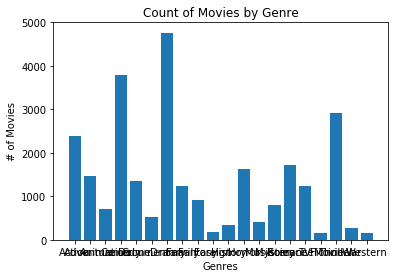

In [22]:
#create bar chart to visualize the sum of genres in the data
locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
heights = [action, adventure, animation, comedy, crime, documentary, drama, family, fantasy, foreign, history, horror, music, mystery, romance, sciencefiction, tvmovie, thriller, war, western]
labels = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
plt.bar(locations, heights, tick_label=labels)
plt.title('Count of Movies by Genre')
plt.xlabel('Genres')
plt.ylabel('# of Movies');

After creating the bar chart, it seems the label names are overlapping. I will try to fix this by creating a horizonal bar chart instead.

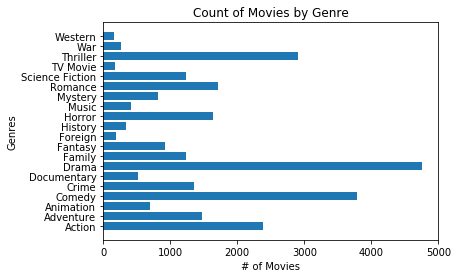

In [23]:
#created horizonal bar chart to see the genre names better
x_axis = [action, adventure, animation, comedy, crime, documentary, drama, family, fantasy, foreign, history, horror, music, mystery, romance, sciencefiction, tvmovie, thriller, war, western]
y_axis = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
plt.barh(y_axis,x_axis)
plt.title('Count of Movies by Genre')
plt.ylabel('Genres')
plt.xlabel('# of Movies')
plt.show()

Here we get to see a better picture of the count of movies by genres using a horizontal bar chart. We can see that the genre "drama" is in about 5,000 movies. This doesn't tell us much so we'll have to aggregate it further.

In this next step, I want to see revenue generated by genre. To do this, I will create a new variable for each genre associated with the revenue.

In [24]:
#assign new revenue veriables to the sum of revenue in each genre column

action_rev = df.loc[(df['Action'] == 1), 'revenue'].sum()
adventure_rev = df.loc[(df['Adventure'] == 1), 'revenue'].sum()
animation_rev = df.loc[(df['Animation'] == 1), 'revenue'].sum()
comedy_rev = df.loc[(df['Comedy'] == 1), 'revenue'].sum()
crime_rev = df.loc[(df['Crime'] == 1), 'revenue'].sum()
documentary_rev = df.loc[(df['Documentary'] == 1), 'revenue'].sum()
drama_rev = df.loc[(df['Drama'] == 1), 'revenue'].sum()
family_rev = df.loc[(df['Family'] == 1), 'revenue'].sum()
fantasy_rev = df.loc[(df['Fantasy'] == 1), 'revenue'].sum()
foreign_rev = df.loc[(df['Foreign'] == 1), 'revenue'].sum()
history_rev = df.loc[(df['History'] == 1), 'revenue'].sum()
horror_rev = df.loc[(df['Horror'] == 1), 'revenue'].sum()
music_rev = df.loc[(df['Music'] == 1), 'revenue'].sum()
mystery_rev = df.loc[(df['Mystery'] == 1), 'revenue'].sum()
romance_rev = df.loc[(df['Romance'] == 1), 'revenue'].sum()
sciencefiction_rev = df.loc[(df['ScienceFiction'] == 1), 'revenue'].sum()
tvmovie_rev = df.loc[(df['TVMovie'] == 1), 'revenue'].sum()
thriller_rev = df.loc[(df['Thriller'] == 1), 'revenue'].sum()
war_rev = df.loc[(df['War'] == 1), 'revenue'].sum()
western_rev = df.loc[(df['Western'] == 1), 'revenue'].sum()

Next, we will plot this on the horizontal line graph.

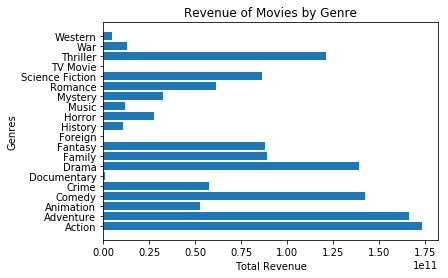

In [25]:
#create horizontal bar chart to see total revenue by genre

df_sorted= df.sort_values('revenue')
#created horizonal bar chart to see the genre names better
x_axis = [action_rev, adventure_rev, animation_rev, comedy_rev, crime_rev, documentary_rev, drama_rev, family_rev, fantasy_rev, foreign_rev, history_rev, horror_rev, music_rev, mystery_rev, romance_rev, sciencefiction_rev, tvmovie_rev, thriller_rev, war_rev, western_rev]
y_axis = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
plt.barh(y_axis, x_axis)
plt.title('Revenue of Movies by Genre')
plt.ylabel('Genres')
plt.xlabel('Total Revenue')
plt.show()

After plotting the bar graph, we can see that the top 5 total revenue generated genre is Action, Adventure, Comedy, Drama, and Thriller.

This doesn't tell us the whole picture since there are more movies in certain genres than others.

Next, I will do a calculation to get revenue per movie by genre, this will give us a better conclusion.

In [26]:
#using the same variable, I will take the revenue generated by genre and divide by the counts of movies in the same genre

action_rev = df.loc[(df['Action'] == 1), 'revenue'].sum() / df.Action.sum()
adventure_rev = df.loc[(df['Adventure'] == 1), 'revenue'].sum() / df.Adventure.sum()
animation_rev = df.loc[(df['Animation'] == 1), 'revenue'].sum() / df.Animation.sum()
comedy_rev = df.loc[(df['Comedy'] == 1), 'revenue'].sum() / df.Comedy.sum()
crime_rev = df.loc[(df['Crime'] == 1), 'revenue'].sum() / df.Crime.sum()
documentary_rev = df.loc[(df['Documentary'] == 1), 'revenue'].sum() / df.Documentary.sum()
drama_rev = df.loc[(df['Drama'] == 1), 'revenue'].sum() / df.Drama.sum()
family_rev = df.loc[(df['Family'] == 1), 'revenue'].sum() / df.Family.sum()
fantasy_rev = df.loc[(df['Fantasy'] == 1), 'revenue'].sum() / df.Fantasy.sum()
foreign_rev = df.loc[(df['Foreign'] == 1), 'revenue'].sum() / df.Foreign.sum()
history_rev = df.loc[(df['History'] == 1), 'revenue'].sum() / df.History.sum()
horror_rev = df.loc[(df['Horror'] == 1), 'revenue'].sum() / df.Horror.sum()
music_rev = df.loc[(df['Music'] == 1), 'revenue'].sum() / df.Music.sum()
mystery_rev = df.loc[(df['Mystery'] == 1), 'revenue'].sum() / df.Mystery.sum()
romance_rev = df.loc[(df['Romance'] == 1), 'revenue'].sum() / df.Romance.sum()
sciencefiction_rev = df.loc[(df['ScienceFiction'] == 1), 'revenue'].sum() / df.ScienceFiction.sum()
tvmovie_rev = df.loc[(df['TVMovie'] == 1), 'revenue'].sum() / df.TVMovie.sum()
thriller_rev = df.loc[(df['Thriller'] == 1), 'revenue'].sum() / df.Thriller.sum()
war_rev = df.loc[(df['War'] == 1), 'revenue'].sum() / df.War.sum()
western_rev = df.loc[(df['Western'] == 1), 'revenue'].sum() / df.Western.sum()



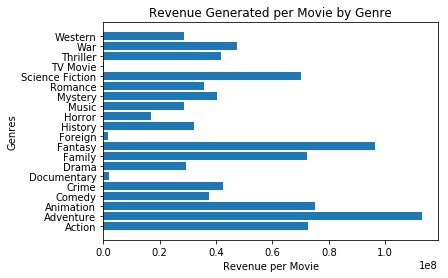

In [27]:
#create horizontal bar chart

df_sorted= df.sort_values('revenue')
#created horizonal bar chart to see the genre names better
x_axis = [action_rev, adventure_rev, animation_rev, comedy_rev, crime_rev, documentary_rev, drama_rev, family_rev, fantasy_rev, foreign_rev, history_rev, horror_rev, music_rev, mystery_rev, romance_rev, sciencefiction_rev, tvmovie_rev, thriller_rev, war_rev, western_rev]
y_axis = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
plt.barh(y_axis, x_axis)
plt.title('Revenue Generated per Movie by Genre')
plt.ylabel('Genres')
plt.xlabel('Revenue per Movie')
plt.show()

After aggregating it by movie count, the top generated revenue per movie by genre is Adventure.

The Top 5 is Adventure, Fantasy, Animation, Family, and Science Fiction.

### Question 2: Is there a correlation between movie ratings and release year?

The first step to answer this question is to plot the variables we will be working with, which is movie ratings and release year. 

Text(0.5,0,'Average Ratings')

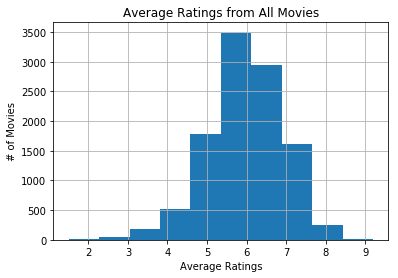

In [30]:
#draw histogram for vote average to see the distribution
df.vote_average.hist()
plt.title('Average Ratings from All Movies')
plt.ylabel('# of Movies')
plt.xlabel('Average Ratings')

This histogram shows us that most movies voting average lies between 5.3 to 6.1

Text(0.5,0,'Release Year')

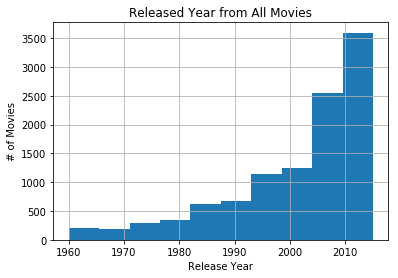

In [40]:
#draw histogram for release year to see the distribution
df.release_year.hist()
plt.title('Released Year from All Movies')
plt.ylabel('# of Movies')
plt.xlabel('Release Year')

This histogram shows us that majority of movies are released after the year 2000

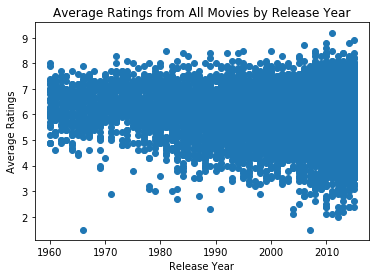

In [39]:
#create scatterplot
x = df['release_year']
y = df['vote_average']
plt.scatter(x, y)
plt.title('Average Ratings from All Movies by Release Year')
plt.ylabel('Average Ratings')
plt.xlabel('Release Year')
plt.show()

Here we can see that there were definitely more movies rated in the later years versus the early years. The early years had less lower ratings.

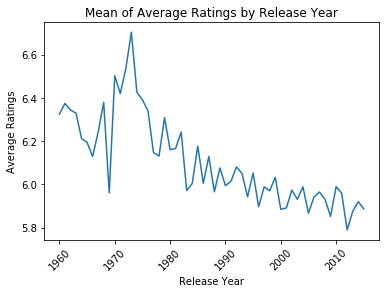

In [36]:
# groupby release  year and vote average
dff = df.groupby(['release_year']).mean()['vote_average']

# plot the result
dff.plot()
plt.xticks(rotation=45)
plt.title('Mean of Average Ratings by Release Year')
plt.ylabel('Average Ratings')
plt.xlabel('Release Year')
plt.show()

After taking the mean ratings by each release year, we have a better picture of how it correlates with vote average. Here we can see that the trend of average movie ratings decreases from 1960 to present.

<a id='conclusions'></a>
## Conclusions
#### Question 1: Which genre generated the most revenue? 

Movies that has the genre "Adventure" will most likely generate more revenue than other genres. Even though the genre "Adventure" did not appear as frequently as the other genres, it still generated more revenue per movie. 

Next Steps: Dive deeper into this analysis and see if the genre "Adventure" alone performs the same without it being a sub-genre.

#### Question 2: Is there a correlation between movie ratings and release year?

In the last line graph, we can see that the trend is negative. This is correlated with the numbers of movies that are released each year. As we start releasing more movies, there seem to be more bad rated movies than good rated movies.

Next Steps: Find out why movies are rated worse than others.


### Limitation
The format of a few columns that were seperated by the character "|" which had to be cleaned up to a working format.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0